In [2]:
# Set the bucket name and a directory prefix where we're going to store our files
bucket = 'sagemaker-heartifyxgboost'
prefix = 'sagemaker/heart'
 
# Assume our IAM role
import boto3
import re
from sagemaker import get_execution_role
data_key = 'heart.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)


role = get_execution_role()

In [3]:
import pandas as pd
import json

heart_data = pd.read_csv(data_location)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
import numpy as np                                
import pandas as pd                               
import matplotlib.pyplot as plt                   
from IPython.display import Image                 
from IPython.display import display               
from time import gmtime, strftime                 
import sys                                        
import math                                       
import json                                       
import os                                         
import sagemaker                                  
from sagemaker.predictor import csv_serializer

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


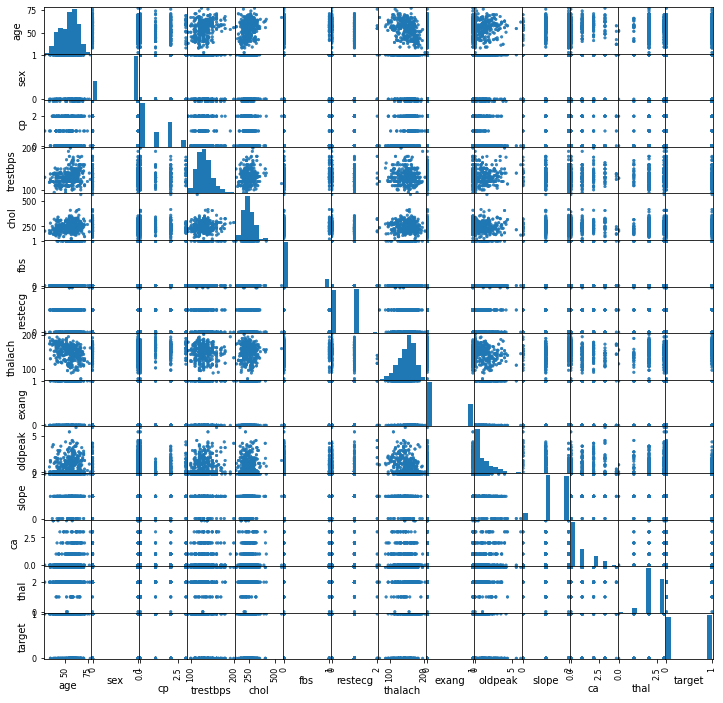

In [6]:
display(heart_data.corr())
pd.plotting.scatter_matrix(heart_data, figsize=(12, 12))
plt.show()

In [8]:
train_data, validation_data, test_data = np.split(heart_data.sample(frac=1, random_state=1729), [int(0.7 * len(heart_data)), int(0.9 * len(heart_data))])
pd.concat([train_data['target'], train_data.drop(['target'], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)
pd.concat([validation_data['target'], validation_data.drop(['target'], axis=1)], axis=1).to_csv('validation.csv', index=False, header=False)

In [9]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

# Model Training

In [13]:
from sagemaker.inputs import TrainingInput
s3_input_train = TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = TrainingInput(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

In [15]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

sess = sagemaker.Session()
xgb = sagemaker.estimator.Estimator(containers[boto3.Session().region_name],
                                    role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

xgb.set_hyperparameters(eta=0.2, 
                        objective='binary:logistic',
                        num_round=100,
                        max_depth=5,
                        gamma=4,
                        min_child_weight=6)

xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2022-05-16 04:04:07 Starting - Starting the training job...ProfilerReport-1652673846: InProgress
...
2022-05-16 04:04:44 Starting - Preparing the instances for training......
2022-05-16 04:06:01 Downloading - Downloading input data......
2022-05-16 04:07:00 Training - Downloading the training image.....Arguments: train
[2022-05-16:04:07:47:INFO] Running standalone xgboost training.
[2022-05-16:04:07:47:INFO] File size need to be processed in the node: 0.03mb. Available memory size in the node: 8460.47mb
[2022-05-16:04:07:47:INFO] Determined delimiter of CSV input is ','
[04:07:47] S3DistributionType set as FullyReplicated
[04:07:47] 717x13 matrix with 9321 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2022-05-16:04:07:47:INFO] Determined delimiter of CSV input is ','
[04:07:47] S3DistributionType set as FullyReplicated
[04:07:47] 205x13 matrix with 2665 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[04:07:4

In [92]:
from sagemaker.serializers import CSVSerializer
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge',serializer = CSVSerializer())

------!

In [93]:
print('Endpoint name: {}'.format(xgb_predictor.endpoint))

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Endpoint name: xgboost-2022-05-16-07-11-03-244


In [94]:
xgb_predictor.serializer = csv_serializer

In [95]:
test_data[5:6].shape

(1, 14)

In [96]:
test_data_check = test_data[5:6].drop(['target'], axis=1).to_numpy()
target = test_data[5:6]['target']
print(target)

845    0
Name: target, dtype: int64


In [97]:
print(type(test_data_check))
print(test_data_check.shape)

<class 'numpy.ndarray'>
(1, 13)


In [98]:
result = xgb_predictor.predict(test_data_check).decode('utf-8')
print(result)

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


0.02603580243885517
